<br><br><center><h1 style="font-size:2.7em;color:#000">MACHINE LEARNING LAB - TUTORIAL 9</h1></center>
<br>
<h1 style="font-size:2em;color:#000">Juan Fernando Espinosa</h1>
<h1 style="font-size:2em;color:#000">303158</h1>

---
<h3 style="font-size:2em;color:#ff4411">1. SPAM FILTER USING SVM</h3>

<h4 style="font-size:2em;color:#2467C0">A. Build a spam filter using a pre-processed dataset</h4>
<br>

In [1]:
from libsvm.python.svmutil import *
import pandas as pd
import pandas as DataFrame
import numpy as np
from nltk import stem
from nltk.corpus import stopwords
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
missing_values = ['-','na','Nan','nan','n/a','?']      
column_names =['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56', '57']
D3 = pd.read_csv("spambase.data", sep=',', na_values = missing_values, names = column_names)
D3.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Training and Testing Splitting

In [3]:
D3_train = D3.sample(frac=0.7, random_state=1)
D3_test = D3.drop(D3_train.index)

Y_train = D3_train['57'].values
print('y_train set:',len(Y_train))
X_train = D3_train.drop(['57'], axis=1).values
print('X_train set:',len(X_train))
Y_test = D3_test['57'].values
print('y_test set:',len(Y_test))
X_test = D3_test.drop(['57'], axis=1).values
print('X_test set:',len(X_test))

y_train set: 3221
X_train set: 3221
y_test set: 1380
X_test set: 1380


### Mixing column name and value into Dictionary - Training

In [4]:
x = []
for i in range(len(X_train)):
    dictionary = {}
    for j in range(len(X_train[i])):
        dictionary[j]=X_train[i][j]
    x.append(dictionary)
print('First row printing:','\n','\n', x[0:1])


First row printing: 
 
 [{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 1.01, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 5.05, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.08800000000000001, 50: 0.0, 51: 0.0, 52: 0.08800000000000001, 53: 0.0, 54: 6.718, 55: 33.0, 56: 215.0}]


### Mixing column name and value into Dictionary - Testing

In [5]:
x_test = []
for i in range(len(X_test)):
    dictionary = {}
    for j in range(len(X_test[i])):
        dictionary[j]=X_test[i][j]
    x_test.append(dictionary)
print('First row printing:','\n','\n', x_test[0:1])

First row printing: 
 
 [{0: 0.06, 1: 0.0, 2: 0.71, 3: 0.0, 4: 1.23, 5: 0.19, 6: 0.19, 7: 0.12, 8: 0.64, 9: 0.25, 10: 0.38, 11: 0.45, 12: 0.12, 13: 0.0, 14: 1.75, 15: 0.06, 16: 0.06, 17: 1.03, 18: 1.36, 19: 0.32, 20: 0.51, 21: 0.0, 22: 1.16, 23: 0.06, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.06, 40: 0.0, 41: 0.0, 42: 0.12, 43: 0.0, 44: 0.06, 45: 0.06, 46: 0.0, 47: 0.0, 48: 0.01, 49: 0.14300000000000002, 50: 0.0, 51: 0.276, 52: 0.184, 53: 0.01, 54: 9.821, 55: 485.0, 56: 2259.0}]


### Training and testing of the model - Classification task

In [6]:
ranges = np.arange(0.1,100,1)
len(ranges)
accuracy_Array = []
mse_array = []
prob  = svm_problem(Y_train, x, isKernel=True)
for i in ranges:
    param = svm_parameter('-c '+str(i))
    m = svm_train(prob, param)
    p_label, p_acc, p_val = svm_predict(Y_test, x_test, m)
    ACC, MSE, SCC = evaluations(Y_test, p_label)
    print('MSE = ', MSE)
    accuracy_Array.append(ACC)
    mse_array.append(MSE)

Accuracy = 75.2899% (1039/1380) (classification)
MSE =  0.24710144927536232
Accuracy = 82.3188% (1136/1380) (classification)
MSE =  0.17681159420289855
Accuracy = 84.4928% (1166/1380) (classification)
MSE =  0.15507246376811595
Accuracy = 84.7101% (1169/1380) (classification)
MSE =  0.15289855072463768
Accuracy = 84.7826% (1170/1380) (classification)
MSE =  0.15217391304347827
Accuracy = 84.9275% (1172/1380) (classification)
MSE =  0.15072463768115943
Accuracy = 84.5652% (1167/1380) (classification)
MSE =  0.15434782608695652
Accuracy = 84.6377% (1168/1380) (classification)
MSE =  0.1536231884057971
Accuracy = 84.5652% (1167/1380) (classification)
MSE =  0.15434782608695652
Accuracy = 84.6377% (1168/1380) (classification)
MSE =  0.1536231884057971
Accuracy = 84.6377% (1168/1380) (classification)
MSE =  0.1536231884057971
Accuracy = 84.4203% (1165/1380) (classification)
MSE =  0.15579710144927536
Accuracy = 84.4928% (1166/1380) (classification)
MSE =  0.15507246376811595
Accuracy = 84.3

### Plot Accuracy and MSE outputs

<function matplotlib.pyplot.show(*args, **kw)>

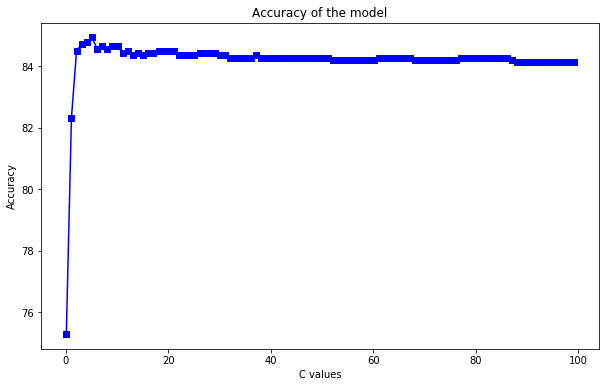

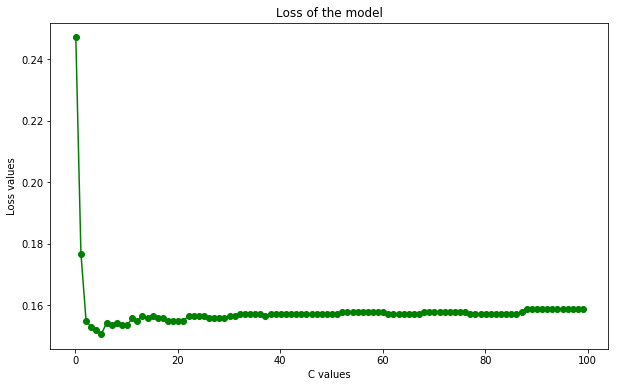

In [7]:
plt.figure(figsize=(10,6))
plt.plot(ranges, accuracy_Array, 'bs-')
plt.title('Accuracy of the model')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.show

plt.figure(figsize=(10,6))
plt.plot(ranges, mse_array, 'go-')
plt.title('Loss of the model')
plt.xlabel('C values')
plt.ylabel('Loss values')
plt.show

In [8]:
target_names = ['ham', 'spam']
print(classification_report(Y_test, p_label, target_names=target_names))

              precision    recall  f1-score   support

         ham       0.89      0.84      0.87       850
        spam       0.77      0.84      0.80       530

    accuracy                           0.84      1380
   macro avg       0.83      0.84      0.83      1380
weighted avg       0.85      0.84      0.84      1380



<h4 style="font-size:2em;color:#2467C0">B. Pre-processed a dataset and learn SVM</h4>
<br>

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=["label", "message"])
print(messages.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
messages['length'] = messages['message'].map(lambda text: len(text))
print(messages.head())


  label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


In [12]:
# Lower case for all the words
messages['message'] = messages['message'].map(lambda x: x.lower())
messages['message'].head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [13]:
# Erasing punctuation of the strings
messages["message"] = messages['message'].str.replace('[^\w\s]','')
messages["message"].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: message, dtype: object

### Streamline workload with pipeline

In [14]:
pipeline = Pipeline([
    ('vect',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('SVM',SVC())
])

### Slit dataset into train and test

In [15]:
# Splitting into Train and Test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size = 0.3, random_state = 1)
#X_train, X_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size = 0.1, random_state = 1)
print("Original set", messages.shape[0], "observations")
print ("Training set", X_train.shape[0], "observations")
print ("Testing set", X_test.shape[0], "observations")


Original set 5572 observations
Training set 3900 observations
Testing set 1672 observations


### Parameters to run into the model

In [16]:
ranges = np.arange(0.1,20,1)
parameters = {'SVM__kernel':['linear', 'rbf'],'SVM__C':[0.0001,0.001,0.1,10,50,100], 'SVM__gamma':[0.1,0.01, 0.001]}

print('SVM__kernel | CV: [linear, rbf]','\n', 'C parameters | CV: [0.0001,0.001,0.1,1,10,50,100]','\n','Gama parameters | CV: [0.1,0.01, 00.1]' )

SVM__kernel | CV: [linear, rbf] 
 C parameters | CV: [0.0001,0.001,0.1,1,10,50,100] 
 Gama parameters | CV: [0.1,0.01, 00.1]


### Cross Validation over parameters previously stated

In [17]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [18]:
# Fit of the trainin
grid.fit(X_train, y_train)
y_hat =grid.fit(X_train, y_train)
print("Best parameter | Training (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
print("Test score = %3.2f" %(grid.score(X_test,y_test)))

Best parameter | Training (CV score=0.984):
{'SVM__C': 100, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
Test score = 0.98


### Plot of the relationship between parameters

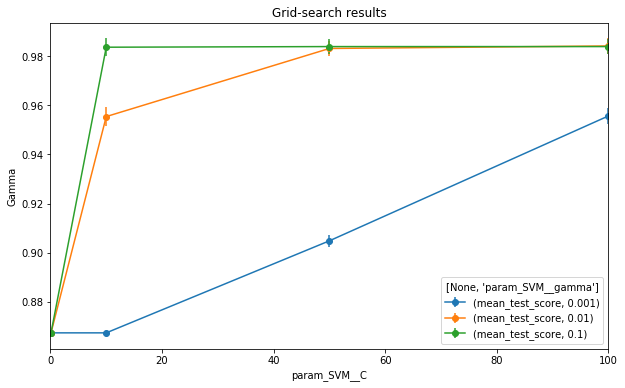

In [19]:
def plot_results(index='SVM__C', columns='SVM__gamma'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    df = pd.DataFrame(grid.cv_results_)

    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
        df = df[df[col] == grid.best_params_[col[6:]]]

    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    plt.figure(figsize=(10,6))
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Grid-search results')
    plt.ylabel('Gamma')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='SVM__C', columns='SVM__gamma')

# SOURCE = []

### Run the training and test with the optimal values

In [20]:
parameters = {'SVM__kernel':['rbf'],'SVM__C':[100], 'SVM__gamma':[0.01]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)

y_true, y_pred = y_test, grid.predict(X_test)
print(classification_report(y_true, y_pred))
p_label, p_acc, p_val = svm_predict(Y_test, x_test, m)
ACC, MSE, SCC = evaluations(Y_test, p_label)
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm)
df = df.rename(columns={0: 'Ham', 1: 'Spam'}, index={0: 'Predicted Ham', 1: 'Predicted Spam'})
df

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1442
        spam       0.98      0.88      0.93       230

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Accuracy = 84.1304% (1161/1380) (classification)


,Ham,Spam
Predicted Ham,1438,4
Predicted Spam,27,203


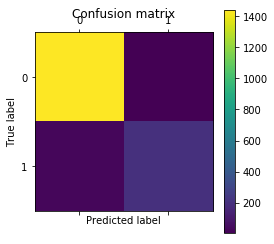

In [21]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<h3 style="font-size:2em;color:#ff4411">2. Compare SVM based spam filter with another model</h3>

### Streamline workload with pipeline

In [22]:
logreg=LogisticRegression()
pipeline_lg = Pipeline([
    ('vect',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('clf',logreg)
])

### Parameters to run into the model

In [23]:
clf__C=[0.0001,0.001,0.1,10,50,100]
parameter_lg = {'clf__C':[0.0001,0.001,0.1,10,50,100]}

### Cross Validation over parameters previously stated

In [24]:
grid_lg = GridSearchCV(pipeline_lg, param_grid=parameter_lg, cv=5)

In [25]:
# Fit of the trainin
grid_lg.fit(X_train, y_train)
print("Best parameter | Training (CV score=%0.3f):" % grid_lg.best_score_)
print(grid_lg.best_params_)
print("Test score = %3.2f" %(grid_lg.score(X_test,y_test)))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best parameter | Training (CV score=0.981):
{'clf__C': 100}
Test score = 0.98


### Run the training and test with the optimal values

In [26]:
parameters1 = {'clf__C':[100]}
grid_lg1 = GridSearchCV(pipeline_lg, param_grid=parameters1, cv=5)
grid_lg1.fit(X_train, y_train)
y_true, y_pred = y_test, grid_lg1.predict(X_test)
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm)
df = df.rename(columns={0: 'Ham', 1: 'Spam'}, index={0: 'Predicted Ham', 1: 'Predicted Spam'})
df

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1442
        spam       0.98      0.89      0.93       230

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



,Ham,Spam
Predicted Ham,1437,5
Predicted Spam,26,204


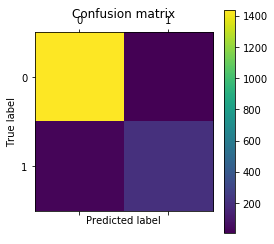

In [27]:
plt.matshow(cm,fignum= 1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<h4 style="font-size:2em;color:#2467C0">Conclusions</h4>
<br>

 <ol>
     <li>The test score does not change in the comparison between the SVM and Logistic models.</li><br>
     <li>Regarding to the accuracy, there is no big difference on the outputs considering the confusion matrix and table the SVM has a lightly improvement against the Logistic Model.</li><br>
    <li>The dataset structure may be influencing the similarity between the models. Therefore, it is not possible to make conclusions based on the information found. </li> <br>
    <li>The distribution in train and test dataset influences as well the accuracy for each model.</li><br>
     <li>The kernel used in SVM plays a major role: it transforms the data for solving complex problems.</li><br>

      
  

<h3 style="font-size:2em;color:#ff4411">3. Bibliography</h3>

> https://www.kaggle.com/darshnaik/sms-spam-or-ham

> https://etav.github.io/projects/spam_message_classifier_naive_bayes.html

> https://radimrehurek.com/data_science_python/

> https://www.kaggle.com/darshnaik/sms-spam-or-ham

> https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

> https://pactools.github.io/auto_examples/plot_grid_search.html

> https://blancas.io/sklearn-evaluation/api/plot.html